Hola **Angel**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# SPRINT 8 Recopilacion y almacenamiento de datos SQL - Proyecto 

## Introduccion

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago.

Tu tarea es encontrar patrones en la información disponible. 

Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

## Diccionario de datos en tablas SQL

**tabla neighborhoods:** datos sobre los barrios de la ciudad
 - `name:` nombre del barrio
 - `neighborhood_id:` código del barrio

**tabla cabs:** datos sobre los taxis
- `cab_id:` código del vehículo
- `vehicle_id:` ID técnico del vehículo
- `company_name:` la empresa propietaria del vehículo

**tabla trips:** datos sobre los viajes
- `trip_id:` código del viaje
- `cab_id:` código del vehículo que opera el viaje
- `start_ts:` fecha y hora del inicio del viaje (tiempo redondeado a la hora)
- `end_ts:` fecha y hora de finalización del viaje (tiempo redondeado a la hora)
- `duration_seconds:` duración del viaje en segundos
- `distance_miles:` distancia del viaje en millas
- `pickup_location_id:` código del barrio de recogida
- `dropoff_location_id:` código del barrio de finalización

**tabla weather_records:** datos sobre el clima
- `record_id:` código del registro meteorológico
- `ts:` fecha y hora del registro (tiempo redondeado a la hora)
- `temperature:` temperatura cuando se tomó el registro
- `description:` breve descripción de las condiciones meteorológicas, por ejemplo, "lluvia ligera" o "nubes dispersas"

## Diccionario de datos en Analisis Python

**project_sql_result_01.csv.** Contiene los siguientes datos:
- `company_name:` nombre de la empresa de taxis
- `trips_amount:` el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

**project_sql_result_04.csv.** Contiene los siguientes datos:
- `dropoff_location_name:` barrios de Chicago donde finalizaron los viajes
- `average_trips:` el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

**project_sql_result_07.csv:** Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.
- `start_ts:` fecha y hora de recogida
- `weather_conditions:` condiciones climáticas en el momento en el que comenzó el viaje
- `duration_seconds:` duración del viaje en segundos

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por incluir esta sección introductoria a tu proyecto, esto hace más fácil el entender el mismo, te animo a mantener esta práctica para el resto de tus proyectos!
</div>

## Carga de librerias y conjunto de datos

In [1]:
#Carga de liberias
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats as st

In [2]:
#Carga de base de datos 1
df_company_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
print(df_company_trips.sample(5))
print()
df_company_trips.info()

                  company_name  trips_amount
36      3591 - 63480 Chuks Cab            37
11                  Globe Taxi          4383
60     2733 - 74600 Benny Jona             7
62  2241 - 44667 - Felman Corp             3
23       KOAM Taxi Association          1259

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [3]:
#Carga de base de datos 2
df_barrios_trips = pd.read_csv('/datasets/project_sql_result_04.csv')
print(df_barrios_trips.sample(5))
print()
df_barrios_trips.info()

   dropoff_location_name  average_trips
77        Archer Heights       8.366667
27              Avondale     208.233333
57               Hermosa      27.566667
15        Garfield Ridge     745.400000
69              Roseland      14.366667

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


**Comments**: Se cargan los datos de ambos datasets, en los cuales se visualiza en el primero un total de 64 filas sin valores nulos en ambas columnas, y en el segundo 94 filas sin valores nulos.

In [4]:
#Carga de base de datos 3
df_trips_loop_aero = pd.read_csv('/datasets/project_sql_result_07.csv')
print(df_trips_loop_aero.sample(5))
print()
df_trips_loop_aero.info()

                start_ts weather_conditions  duration_seconds
50   2017-11-11 12:00:00               Good            1980.0
163  2017-11-11 09:00:00               Good               0.0
267  2017-11-04 02:00:00               Good            2956.0
48   2017-11-04 09:00:00               Good            1560.0
543  2017-11-18 06:00:00               Good            1500.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Carga de datos correcta! 
</div>

## Procesamiento de los datos

### Columna "company_name" (df_company_trips) 

In [5]:
#Valores en columna company_name
df_company_trips['company_name']

0                           Flash Cab
1           Taxi Affiliation Services
2                   Medallion Leasing
3                          Yellow Cab
4     Taxi Affiliation Service Yellow
                   ...               
59       4053 - 40193 Adwar H. Nikola
60            2733 - 74600 Benny Jona
61      5874 - 73628 Sergey Cab Corp.
62         2241 - 44667 - Felman Corp
63        3556 - 36214 RC Andrews Cab
Name: company_name, Length: 64, dtype: object

In [6]:
#Cambiar nombres de company_name a minusculas
df_company_trips['company_name'] = df_company_trips['company_name'].str.lower()
df_company_trips['company_name'] = df_company_trips['company_name'].str.strip()
df_company_trips['company_name']

0                           flash cab
1           taxi affiliation services
2                   medallion leasing
3                          yellow cab
4     taxi affiliation service yellow
                   ...               
59       4053 - 40193 adwar h. nikola
60            2733 - 74600 benny jona
61      5874 - 73628 sergey cab corp.
62         2241 - 44667 - felman corp
63        3556 - 36214 rc andrews cab
Name: company_name, Length: 64, dtype: object

**Comments**: el tipo de dato para esta columna es el adecuado. Solo se hace el cambio de valores a minusculas.

### Columna "trips_amount" (df_company_trips) 

In [7]:
#Valores en columna trips_amount
df_company_trips['trips_amount']

0     19558
1     11422
2     10367
3      9888
4      9299
      ...  
59        7
60        7
61        5
62        3
63        2
Name: trips_amount, Length: 64, dtype: int64

In [8]:
#Identificacion de total de viajes
df_company_trips['trips_amount'].sum()

137311

**Comments**: no se identifican cambios necesarios para esta columna.

### Identificacion de valores duplicados (df_company_trips) 

In [9]:
#Validacion de lineas duplicadas completas 
df_company_trips[df_company_trips.duplicated()]

,company_name,trips_amount


In [10]:
#Validacion de duplicados en colummna 'company_name'
df_company_trips[df_company_trips['company_name'].duplicated()]

,company_name,trips_amount


**Comment:** en el primer dataset se identifican 64 compañias diferentes de taxi las cuales realizaron un total de +137K viajes. Los tipos de datos son correctos y no se encuentran valores ausentes. No se visualizan duplicados por linea ni por la columna "company_name". 

### Columna "dropoff_location_name" (df_barrios_trips) 

In [11]:
#Valores en columna dropoff_location_name
df_barrios_trips['dropoff_location_name']

0                Loop
1         River North
2       Streeterville
3           West Loop
4              O'Hare
           ...       
89    Mount Greenwood
90          Hegewisch
91           Burnside
92          East Side
93          Riverdale
Name: dropoff_location_name, Length: 94, dtype: object

In [12]:
#Cambiar nombres de dropoff_location_name a minusculas
df_barrios_trips['dropoff_location_name'] = df_barrios_trips['dropoff_location_name'].str.lower()
df_barrios_trips['dropoff_location_name'] = df_barrios_trips['dropoff_location_name'].str.strip()
df_barrios_trips['dropoff_location_name']

0                loop
1         river north
2       streeterville
3           west loop
4              o'hare
           ...       
89    mount greenwood
90          hegewisch
91           burnside
92          east side
93          riverdale
Name: dropoff_location_name, Length: 94, dtype: object

**Comments**: el tipo de dato para esta columna es el adecuado. Solo se hace el cambio de valores a minusculas.

### Columna "average_trips" (df_barrios_trips) 

In [13]:
#Valores en columna average_trips
df_barrios_trips['average_trips']

0     10727.466667
1      9523.666667
2      6664.666667
3      5163.666667
4      2546.900000
          ...     
89        3.137931
90        3.117647
91        2.333333
92        1.961538
93        1.800000
Name: average_trips, Length: 94, dtype: float64

In [14]:
#Identificacion de promedio de viajes
df_barrios_trips['average_trips'].mean()

599.9537281902999

**Comments**: no se identifican cambios necesarios para esta columna.

### Identificacion de valores duplicados (df_company_trips) 

In [15]:
#Validacion de lineas duplicadas completas 
df_barrios_trips[df_barrios_trips.duplicated()]

,dropoff_location_name,average_trips


In [16]:
#Validacion de duplicados en colummna 'dropoff_location_name'
df_barrios_trips[df_barrios_trips['dropoff_location_name'].duplicated()]

,dropoff_location_name,average_trips


**Comment:** en el segundo dataset se identifican 94 drop-off locations diferentes, las cuales tienen un promedio de casi 600 por location. Los tipos de datos son correctos y no se encuentran valores ausentes. No se visualizan duplicados por linea ni por la columna "dropoff_location_name". 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con este preprocesamiento y análisis inicial de tus datos, un dataset limpio es clave para obtener métricas adecuadas 
</div>

## Analisis Exploratorio

###  Top 10 principales barrios en términos de finalización

In [17]:
top_10_dropoff = df_barrios_trips.sort_index(ascending=True)
top_10_dropoff = top_10_dropoff.head(10)
top_10_dropoff

,dropoff_location_name,average_trips
0,loop,10727.466667
1,river north,9523.666667
2,streeterville,6664.666667
3,west loop,5163.666667
4,o'hare,2546.900000
5,lake view,2420.966667
6,grant park,2068.533333
7,museum campus,1510.000000
8,gold coast,1364.233333
9,sheffield & depaul,1259.766667


<AxesSubplot:title={'center':'Promedio de viajes por ubicacion de finalizacion en Chicago'}, xlabel='Dropoff_Location', ylabel='Average'>

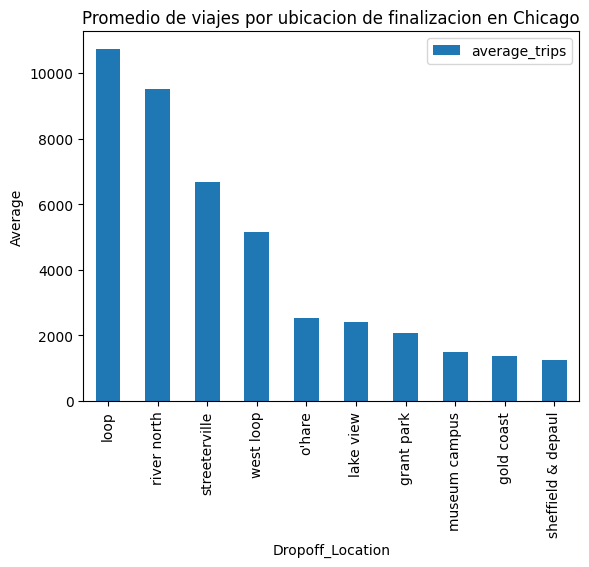

In [18]:
top_10_dropoff.plot(
    kind = 'bar',
    title = 'Promedio de viajes por ubicacion de finalizacion en Chicago',
    xlabel = 'Dropoff_Location',
    ylabel = 'Average',
    x = 'dropoff_location_name'
)

**Comment:** analizando las ubicaciones en Google Maps, se identifica que las 4 primeras son en el downtown, ya sea en el Loop o en la parte norte del mismo, con un promedio por encima de los 5k viajes. La quinta ubicacion es el aeropuerto internacional de la ciudad con un promedio de 2.5k viajes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente, se muestra una gráfica clara de los top 10 principales barrios. 
</div>

###  Top 10 principales empresas de taxis

In [19]:
top_10_companies = df_company_trips.sort_index(ascending=True)
top_10_companies = top_10_companies.head(10)
top_10_companies

,company_name,trips_amount
0,flash cab,19558
1,taxi affiliation services,11422
2,medallion leasing,10367
3,yellow cab,9888
4,taxi affiliation service yellow,9299
5,chicago carriage cab corp,9181
6,city service,8448
7,sun taxi,7701
8,star north management llc,7455
9,blue ribbon taxi association inc.,5953


<AxesSubplot:title={'center':'Viajes totales por compañia de taxis el 15 y 16 de Nov en Chicago'}, xlabel='Company Name', ylabel='Total trips'>

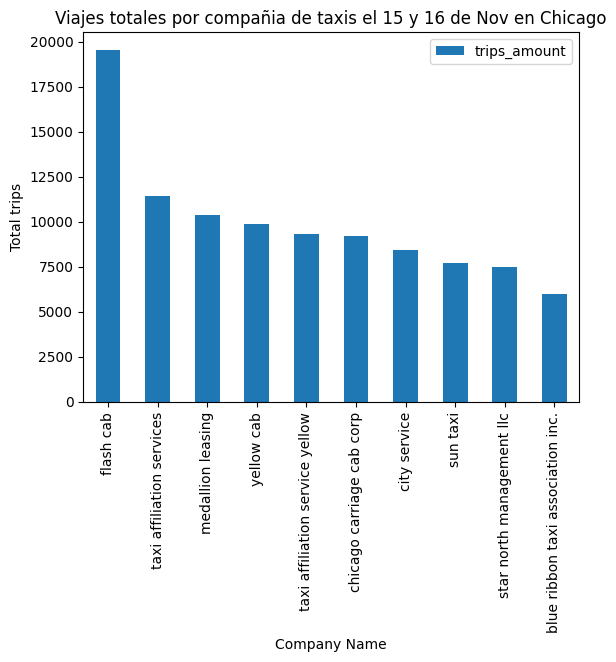

In [20]:
top_10_companies.plot(
    kind = 'bar',
    title = 'Viajes totales por compañia de taxis el 15 y 16 de Nov en Chicago',
    xlabel = 'Company Name',
    ylabel = 'Total trips',
    x = 'company_name'
)

**Comment:** se identifican las top 10 empresas de taxis en Chicago, de las cuales destaca Flash Cab como empresa dominante en el mercado, con un total de +19.5k viajes. Hay una mayor diferencia (+8.1k viajes) entre la empresa #1 y la #2, que entre la #2 y la #10 (5.4k viajes).

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente, se muestra una gráfica clara de los top 10 principales empresas. 
</div>

## Prueba de Hipotesis

In [21]:
#Generacion de nueva columna identificando el dia de la semana segun .isocalendar()
df_trips_loop_aero['day'] = pd.to_datetime(df_trips_loop_aero['start_ts']).dt.isocalendar().day
df_trips_loop_aero['day'].value_counts()

6    1068
Name: day, dtype: Int64

In [22]:
#Filtro de dataframe para segmentar solo los dias sabados.
df_trips_loop_aero_ = df_trips_loop_aero[df_trips_loop_aero['day'] == 6]
print(df_trips_loop_aero_)

                 start_ts weather_conditions  duration_seconds  day
0     2017-11-25 16:00:00               Good            2410.0    6
1     2017-11-25 14:00:00               Good            1920.0    6
2     2017-11-25 12:00:00               Good            1543.0    6
3     2017-11-04 10:00:00               Good            2512.0    6
4     2017-11-11 07:00:00               Good            1440.0    6
...                   ...                ...               ...  ...
1063  2017-11-25 11:00:00               Good               0.0    6
1064  2017-11-11 10:00:00               Good            1318.0    6
1065  2017-11-11 13:00:00               Good            2100.0    6
1066  2017-11-11 08:00:00               Good            1380.0    6
1067  2017-11-04 16:00:00                Bad            2834.0    6

[1068 rows x 4 columns]


In [23]:
#Identificacion de magnitud de valores en weather_conditions 
df_trips_loop_aero_['weather_conditions'].value_counts()

Good    888
Bad     180
Name: weather_conditions, dtype: int64

In [24]:
#Calculo del promedio de duracion de viajer por condicion climatica
df_trips_loop_aero_.groupby('weather_conditions')['duration_seconds'].mean()

weather_conditions
Bad     2427.205556
Good    1999.675676
Name: duration_seconds, dtype: float64

In [25]:
#Calculo de varianza para valores de Good Conditions en viajes del Loop al Aeropuerto
np.var(df_trips_loop_aero_[df_trips_loop_aero_['weather_conditions'] == 'Good']['duration_seconds'])

575732.9308497686

In [26]:
#Calculo de varianza para valores de Bad Conditions en viajes del Loop al Aeropuerto
np.var(df_trips_loop_aero_[df_trips_loop_aero_['weather_conditions'] == 'Bad']['duration_seconds'])

517403.56330246915

In [27]:
# Prueba de Levene centrada en la mediana

alpha = 0.05 #nivel de significacion

st.levene(df_trips_loop_aero_[df_trips_loop_aero_['weather_conditions'] == 'Good']['duration_seconds'],
    df_trips_loop_aero_[df_trips_loop_aero_['weather_conditions'] == 'Bad']['duration_seconds'], center = 'median')

LeveneResult(statistic=0.38853489683656073, pvalue=0.5332038671974493)

In [28]:
# Prueba de Levene centrada en la media

alpha = 0.05 #nivel de significacion

st.levene(df_trips_loop_aero_[df_trips_loop_aero_['weather_conditions'] == 'Good']['duration_seconds'],
    df_trips_loop_aero_[df_trips_loop_aero_['weather_conditions'] == 'Bad']['duration_seconds'], center = 'mean')

LeveneResult(statistic=0.7184273561022895, pvalue=0.3968505113995001)

**Comments**: se calculan las varianzas de ambas muestras y se realiza prueba de Levene tanto centrada en la mediana como centrada en la media y con los valores obtenidos mayores a 0.05 (0.53 & 0.39) no se descarta la hipotesis nula, por lo que se determina que las varianzas seran iguales en la prueba de hipotesis. 

In [29]:
# Prueba las hipótesis

#H0 = 'La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual los sábados lluviosos".'
#Ha = 'La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.'

alpha = 0.05 #nivel de significacion

result = st.ttest_ind(
    df_trips_loop_aero_[df_trips_loop_aero_['weather_conditions'] == 'Good']['duration_seconds'],
    df_trips_loop_aero_[df_trips_loop_aero_['weather_conditions'] == 'Bad']['duration_seconds'],
    equal_var = True
)
print("Valor p:",(result.pvalue * 100).round(5),'%')

Valor p: 0.0 %


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Realizaste un muy buen avance con tu proyecto Angel! Pero en esta parte de la prueba de hipótesis te hace falta incluir una parte del filtro para que tomes los datos solo de los días sábados, la parte de si está con lluvia es correcta pero no se está filtrando para los días sábados
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>: Gracias por la observacion, al inicio del bloque se realiza el filtro en un nuevo dataframe df_trips_loop_aero_ con los valores de dia = 6 (Sabado), para posteriormente continuar con las pruebas de varianza e hipotesis. 
</div>

**Comments**: se generan la prueba de hipotesis, debido a que se busca comparar la igualdad de las medias entre dos poblaciones estadisticas, se procede a aplicar la prueba de dos muestras con la funcion scipy.stats.ttest_ind y se establece un umbral alpha de 0.05.
- Al comparar la duracion promedio de los viajes desde el Loop hasta el Aeropueto en sabados lluviosos, se define como hipotesis nula que son las mismas, e hipotesis alternativa que son diferentes. Se descarta la hipotesis nula por el valor P obtenido de 0.0%.

## Conclusion General

Para este proyecto se realizaron los siguientes pasos:

1) **Carga de librerias y conjunto de datos**
    - *tabla neighborhoods:* datos sobre los barrios de la ciudad
    - *tabla cabs:* datos sobre los taxis
    - *tabla trips:* datos sobre los viajes
    - *tabla weather_records:* datos sobre el clima
    - *project_sql_result_01.csv:* datos sobre las empresas de taxi y cantidad de viajes el 15 y 16 de noviembre de 2017.
    - *project_sql_result_04.csv:* datos sobre barrios de Chicago donde finalizan viajes y el promedio de los mismos.
    - *project_sql_result_07.csv:* datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.**

2) **Procesamiento de los datos.**
    - *Columna "company_name" (df_company_trips)*: el tipo de dato para esta columna es el adecuado. Solo se hace el cambio de valores a minusculas.
    - *Columna "trips_amount" (df_company_trips)*: no se identifican cambios necesarios para esta columna.
    - *Identificacion de valores duplicados (df_company_trips)*: en el primer dataset se identifican 64 compañias diferentes de taxi las cuales realizaron un total de +137K viajes. Los tipos de datos son correctos y no se encuentran valores ausentes. No se visualizan duplicados por linea ni por la columna "company_name". 
    - *Columna "dropoff_location_name" (df_barrios_trips)*: el tipo de dato para esta columna es el adecuado. Solo se hace el cambio de valores a minusculas.
    - *Columna "average_trips" (df_barrios_trips)*: no se identifican cambios necesarios para esta columna.
    - *Identificacion de valores duplicados (df_company_trips) *: en el segundo dataset se identifican 94 drop-off locations diferentes, las cuales tienen un promedio de casi 600 por location. Los tipos de datos son correctos y no se encuentran valores ausentes. No se visualizan duplicados por linea ni por la columna "dropoff_location_name". 

3) **Analisis Exploratorio.**
    - *Top 10 principales barrios en términos de finalización*: alizando las ubicaciones en Google Maps, se identifica que las 4 primeras son en el downtown, ya sea en el Loop o en la parte norte del mismo, con un promedio por encima de los 5k viajes. La quinta ubicacion es el aeropuerto internacional de la ciudad con un promedio de 2.5k viajes.
    - *Top 10 principales empresas de taxis*: se identifican las top 10 empresas de taxis en Chicago, de las cuales destaca Flash Cab como empresa dominante en el mercado, con un total de +19.5k viajes. Hay una mayor diferencia (+8.1k viajes) entre la empresa #1 y la #2, que entre la #2 y la #10 (5.4k viajes).
    
<div class="alert alert-block alert-info">
<a class=“tocSkip”></a> 
    - Top 10 principales barrios: se concluye que principalmente los barrios con mayor demanda se encuentran en el centro o el aeropuerto, por lo que se deberia priorizar tener un volumen significativo de taxis/bases en estas locaciones para eventualmente poder retonar a los pasajeros a su lugar de origen.
</div>
<div class="alert alert-block alert-info">
<a class=“tocSkip”></a>
    - Top 10 empresas: se concluye que hay un significativo dominio del mercado por parte de Flash Cab, por lo que resultaria interesante hacer un analisis de sus estrategias con el fin de realizar benchmarking e identificar acciones que se puedan replicar o mejorar.
</div>
    

4) **Prueba de Hipotesis.**
    - Se genera la prueba de hipotesis, debido a que se busca comparar la igualdad de las medias entre dos poblaciones estadisticas, se procede a aplicar la prueba de dos muestras con la funcion scipy.stats.ttest_ind y se establece un umbral alpha de 0.05.
        - Al comparar la duracion promedio de los viajes desde el Loop hasta el Aeropuerto en sabados lluviosos, se define como hipotesis nula que son las mismas, e hipotesis alternativa que son diferentes. 
        - Se descarta la hipotesis nula por el valor P obtenido de 0.0%.

<div class="alert alert-block alert-info">
<a class=“tocSkip”></a>
    - Se concluye que no es igual la duracion de los viajes de los viajes del Loop al Aeropuerto comparando contra los sabados lluviosos, por lo que se recomienda revisar los pronosticos del clima con anticipacion para poder prever tener disponibles mas unidades, ya que tardan mas en desocuparse, y asi evitar perder posibles viajes o generar mas demoras en los clientes.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Para tus conclusiones no sólo debes redactar en cuanto al proceso técnico que realizaste sino a las métricas que has revisado, las gráficas mostradas, que nos dicen estos datos que puedan traer valor a la empresa, la prueba de hipótesis a que conclusión nos lleva? Deberías responder a este tipo de preguntas en la sección final de tu notebook
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>: Gracias por la observacion, se complementan las conlcusiones con comentarios de los resultados obtenidos y recomendaciones de valor para la empresa. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con los cambios! Ahora es más claro lo que concluíste respecto a tu trabajo. Recuerda siempre revisar los datos con los que vas a revisar las pruebas de hipótesis ya que es un punto importante cuando más adelante hagas pruebas AB y determines el grupo que mejor desempeño tuvo en tu experimento.
</div>